## Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
glass_df = pd.read_csv(r"glass.csv")

In [3]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_df.shape

(214, 10)

In [5]:
# Checking datatypes
glass_df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
# Checking dupliacte values
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
glass_df = glass_df.drop_duplicates()

In [8]:
# Checking dupliacte values
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [9]:
# Reset the index
glass_df.reset_index(drop=True, inplace=True)

In [10]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
# Finding Missing Values
nan_bool_df = glass_df.isna()

# Use sum() to count the number of True values (NaN) in each column
nan_count_per_column = nan_bool_df.sum()

# If you want the total count of NaN values in the entire DataFrame, you can sum the nan_count_per_column
total_nan_count = nan_count_per_column.sum()

nan_count_per_column

total_nan_count

0

In [12]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Outliers detection

### Using Box Plot to detect the outliers 

Indices of outliers from the box plots:
[5, 21, 32, 36, 38, 43, 46, 49, 55, 60, 70, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 117, 127, 128, 129, 130, 134, 140, 141, 144, 160, 161, 162, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]
78


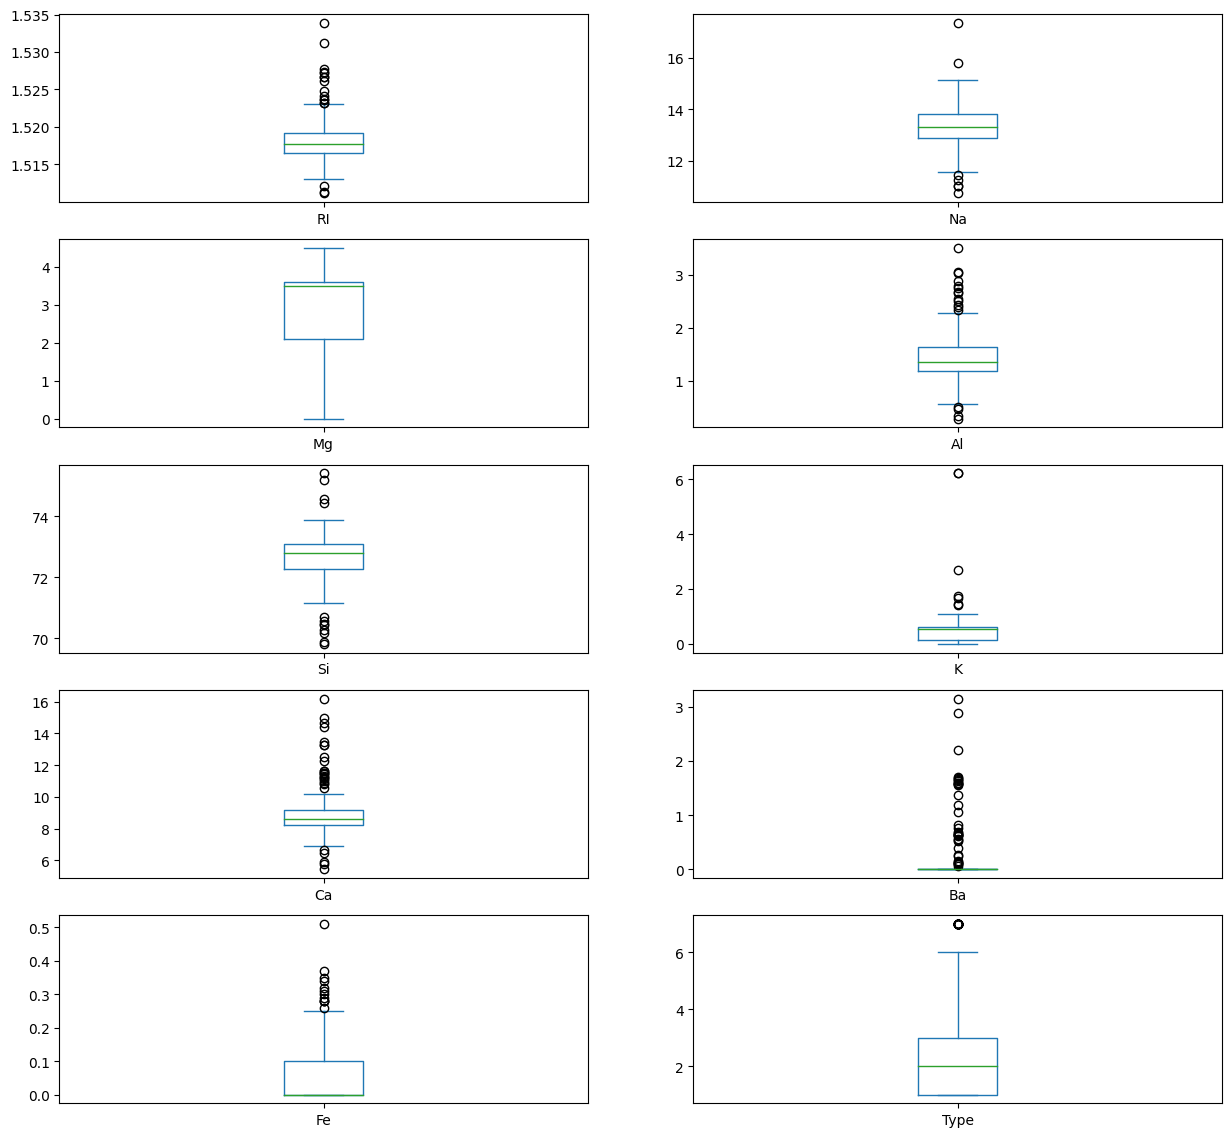

In [13]:
# Box plot find the outliers 

box_plot = glass_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = glass_df.quantile(0.25)
Q3 = glass_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(glass_df.columns, box_plot):
    outliers = ((glass_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (glass_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = glass_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

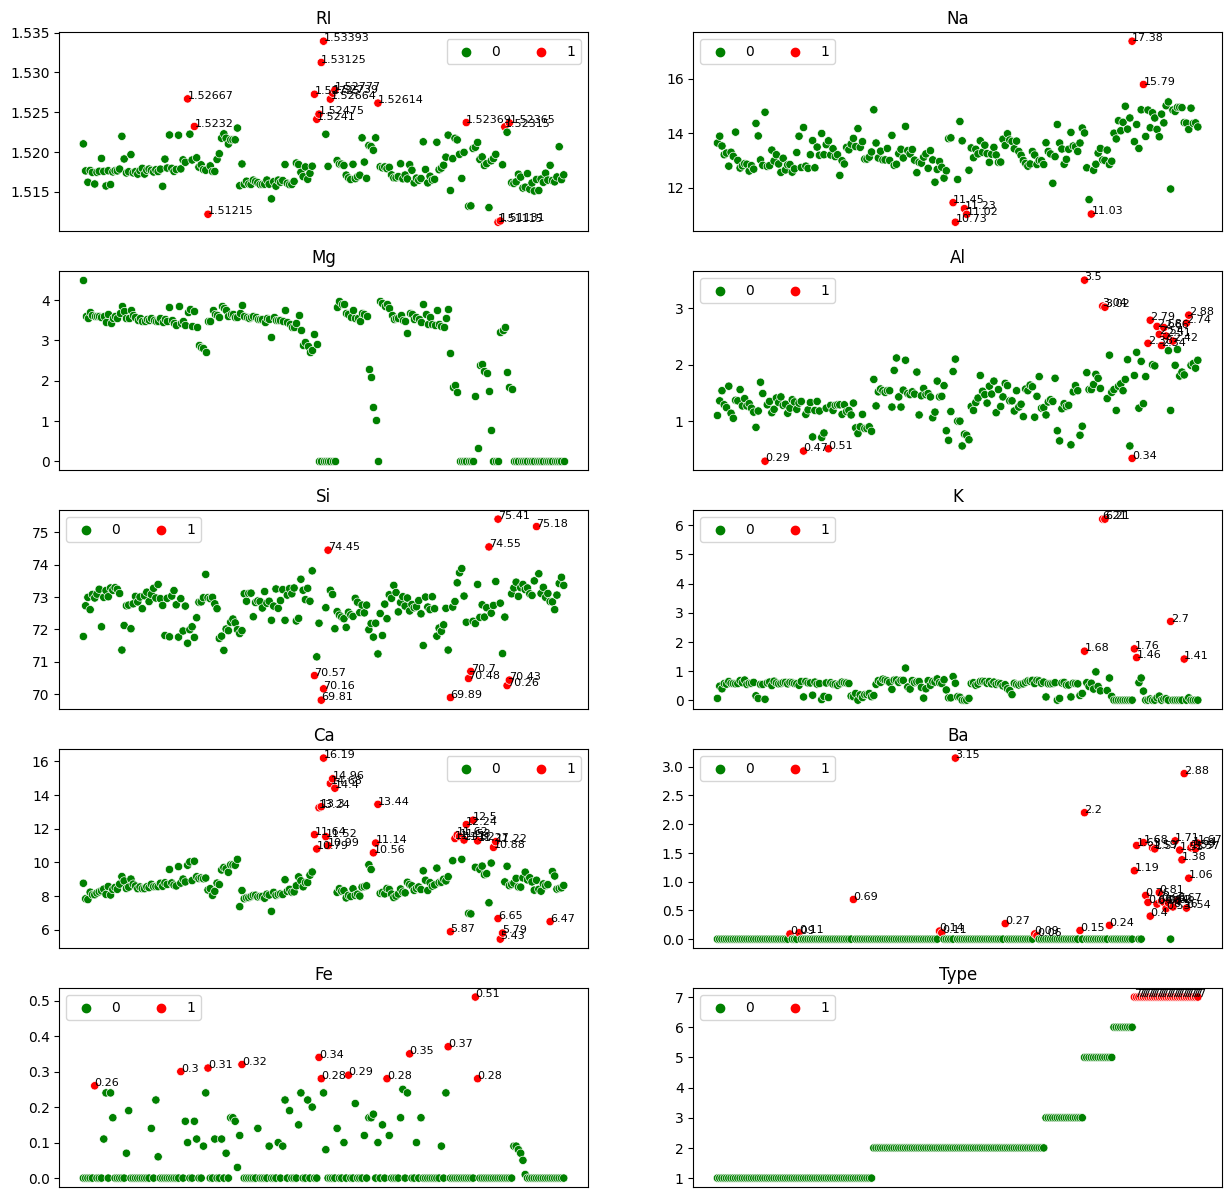

Row indices of potential outliers:
Int64Index([  5,  21,  32,  36,  38,  43,  46,  49,  55,  60,  70,  98,  99,
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 117, 127, 128,
            129, 130, 134, 140, 141, 144, 160, 161, 162, 164, 165, 166, 168,
            169, 170, 171, 172, 173, 174, 179, 181, 182, 183, 184, 185, 186,
            187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
            200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212],
           dtype='int64')


In [14]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(glass_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(glass_df[i], 1.5)
   
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(glass_df[i])), y = glass_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(glass_df[i])), y = glass_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(glass_df[i]))[outliers == 1], glass_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
plt.show()

# Calculate the IQR for each variable
Q1 = glass_df.quantile(0.25)
Q3 = glass_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Identify potential outliers based on the IQR method
outliers = ((glass_df < (Q1 - IQR_multiplier * IQR)) | (glass_df > (Q3 + IQR_multiplier * IQR)))

# Get the row indices of potential outliers
row_indices = glass_df.index[outliers.any(axis=1)]

# Print the row indices of potential outliers
print("Row indices of potential outliers:")
print(row_indices)

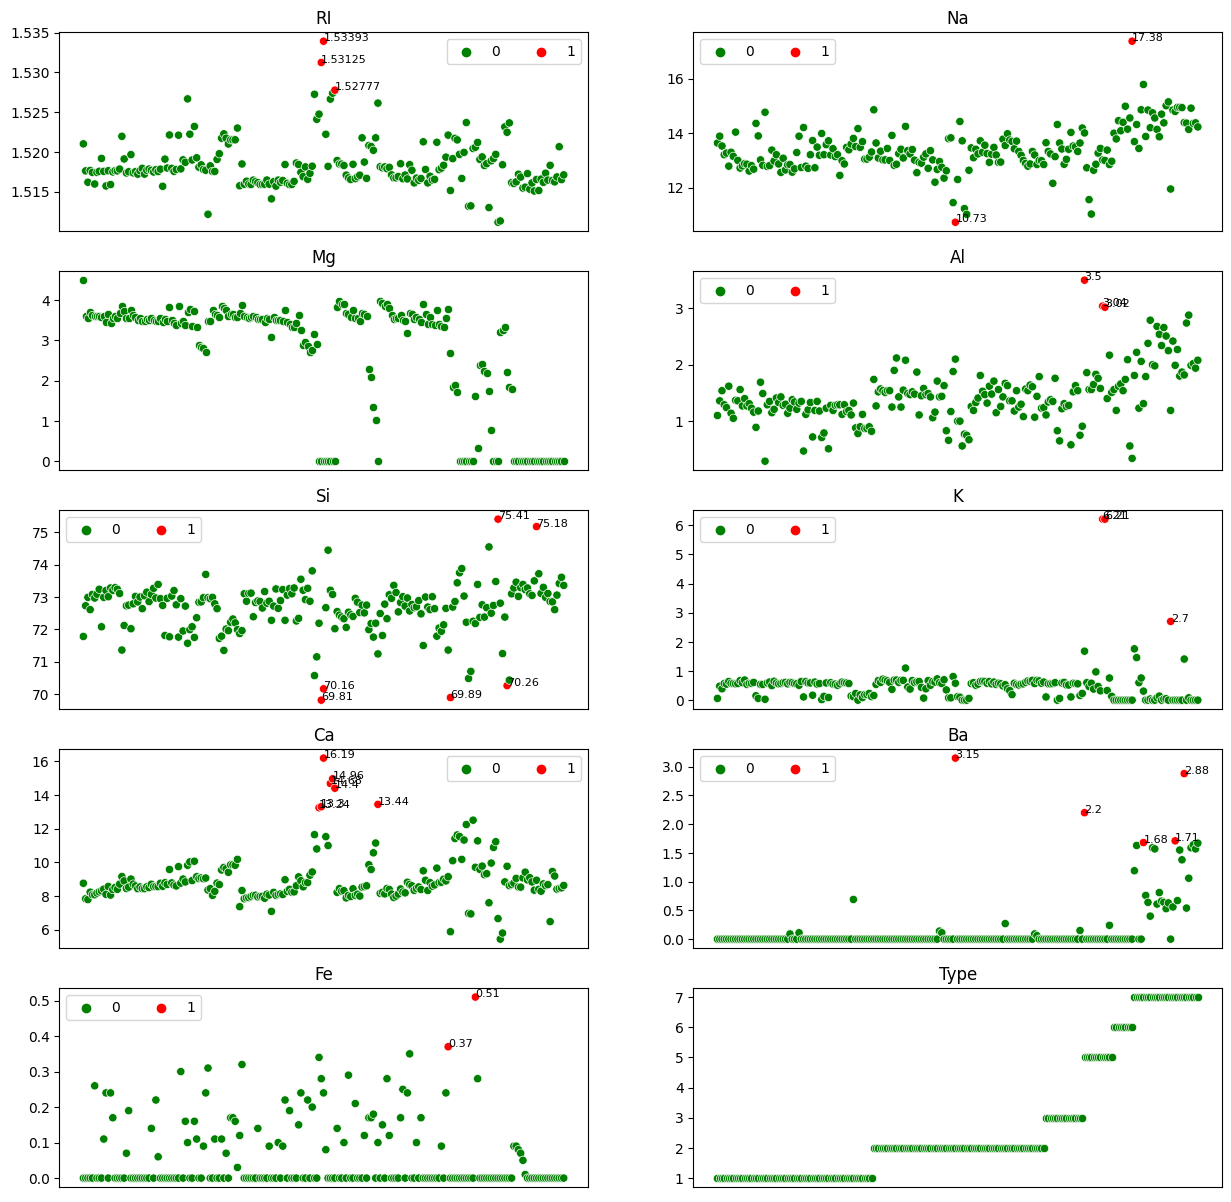

In [15]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(glass_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(glass_df[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(glass_df[i])), y = glass_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(glass_df[i])), y = glass_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(glass_df[i]))[outliers == 1], glass_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1

plt.show()


### Even though the outlier methods shows so many records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

#### We need to carefully consider each feature and we need to treat the outliers accordling.

#### The outliers identified by z scores is common to outliers identified by box plot and IQR. So we need to treat these outliers. 

#### 1. Feature Refractive Index has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 2. Feature Sodium has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 3. Feature Magnesium has outliers but none of the value is negative. The values range from 0 to 4.5 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 4. Feature Aluminum has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 5. Feature Silicon has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 6. Feature Potassium has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 7. Feature Calcium has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 8. Feature Barium has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 9. Feature Iron has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 10. Feature Type has outliers but none of the value is negative. The values range from 1 to 7 which is a reasonable range for the dataset. Hence no outlier treatment is required.

### Manually finding the extreme outliers and replacing with the median value.

In [16]:
glass_df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [17]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = glass_df[(glass_df["Na"] <= 10.73) | (glass_df["Na"] >= 17.38)]
record2 = glass_df[(glass_df["RI"] >= 1.52777)]
record3 = glass_df[(glass_df["Al"] >= 3.02)]
record4 = glass_df[(glass_df["Si"] <= 70.26) | (glass_df["Si"] >= 75.18)]
record5 = glass_df[(glass_df["K"] >= 2.7)]
record6 = glass_df[(glass_df["Ca"] >= 13.2)]
record7 = glass_df[(glass_df["Ba"] >= 1.68)]
record8 = glass_df[(glass_df["Fe"] >= 0.37)]

print(record1)
print(record2)
print(record3)
print(record4)
print(record5)
print(record6)
print(record7)
print(record8)

          RI     Na   Mg    Al     Si     K     Ca    Ba    Fe  Type
105  1.53125  10.73  0.0  2.10  69.81  0.58  13.30  3.15  0.28     2
183  1.51115  17.38  0.0  0.34  75.41  0.00   6.65  0.00  0.00     6
          RI     Na   Mg    Al     Si     K     Ca    Ba    Fe  Type
105  1.53125  10.73  0.0  2.10  69.81  0.58  13.30  3.15  0.28     2
106  1.53393  12.30  0.0  1.00  70.16  0.12  16.19  0.00  0.24     2
111  1.52777  12.64  0.0  0.67  72.02  0.06  14.40  0.00  0.00     2
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
162  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.2  0.0     5
170  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.0  0.0     5
171  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.0  0.0     5
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
162  1.51514  14.01  2.68  3.50  69.89 

In [18]:
# Create lists of indices from the filtered records
indices_record1 = record1.index.tolist()
indices_record2 = record2.index.tolist()
indices_record3 = record3.index.tolist()
indices_record4 = record4.index.tolist()
indices_record5 = record5.index.tolist()
indices_record6 = record6.index.tolist()
indices_record7 = record7.index.tolist()
indices_record8 = record8.index.tolist()


# Calculate the median values for the columns used for filtering
median_na = glass_df["Na"].median()
median_ri = glass_df["RI"].median()
median_al = glass_df["Al"].median()
median_si = glass_df["Si"].median()
median_k = glass_df["K"].median()
median_ca = glass_df["Ca"].median()
median_ba = glass_df["Ba"].median()
median_fe = glass_df["Fe"].median()

# Replace values in the original DataFrame at specified indices with the respective median values
glass_df.loc[indices_record1, "Na"] = median_na
glass_df.loc[indices_record2, "RI"] = median_ri
glass_df.loc[indices_record3, "Al"] = median_al
glass_df.loc[indices_record4, "Si"] = median_si
glass_df.loc[indices_record5, "K"] = median_k
glass_df.loc[indices_record6, "Ca"] = median_ca
glass_df.loc[indices_record7, "Ba"] = median_ba
glass_df.loc[indices_record8, "Fe"] = median_fe


In [19]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = glass_df[(glass_df["Na"] <= 10.73) | (glass_df["Na"] >= 17.38)]
record2 = glass_df[(glass_df["RI"] >= 1.52777)]
record3 = glass_df[(glass_df["Al"] >= 3.02)]
record4 = glass_df[(glass_df["Si"] <= 70.26) | (glass_df["Si"] >= 75.18)]
record5 = glass_df[(glass_df["K"] >= 2.7)]
record6 = glass_df[(glass_df["Ca"] >= 13.2)]
record7 = glass_df[(glass_df["Ba"] >= 1.68)]
record8 = glass_df[(glass_df["Fe"] >= 0.37)]

print(record1)
print(record2)
print(record3)
print(record4)
print(record5)
print(record6)
print(record7)
print(record8)

Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []


### Calculating the range for the continuous variable after outlier treatment.

In [20]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518160,13.396995,2.679202,1.423756,72.683380,0.435775,8.766244,0.121315,0.053146,2.788732
std,0.002612,0.747458,1.443691,0.449433,0.634226,0.303550,1.009704,0.358709,0.090052,2.105130
min,1.511150,11.020000,0.000000,0.290000,70.430000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.930000,2.090000,1.190000,72.340000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519050,13.800000,3.600000,1.620000,73.080000,0.600000,9.060000,0.000000,0.090000,3.000000
max,1.527390,15.790000,4.490000,2.880000,74.550000,1.760000,12.500000,1.670000,0.350000,7.000000


### Box plot after outlier treatment.

Indices of outliers from the box plots:
[5, 10, 12, 21, 32, 36, 38, 43, 46, 49, 54, 55, 60, 68, 70, 96, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 117, 127, 128, 129, 130, 134, 140, 141, 143, 144, 160, 162, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212]
82


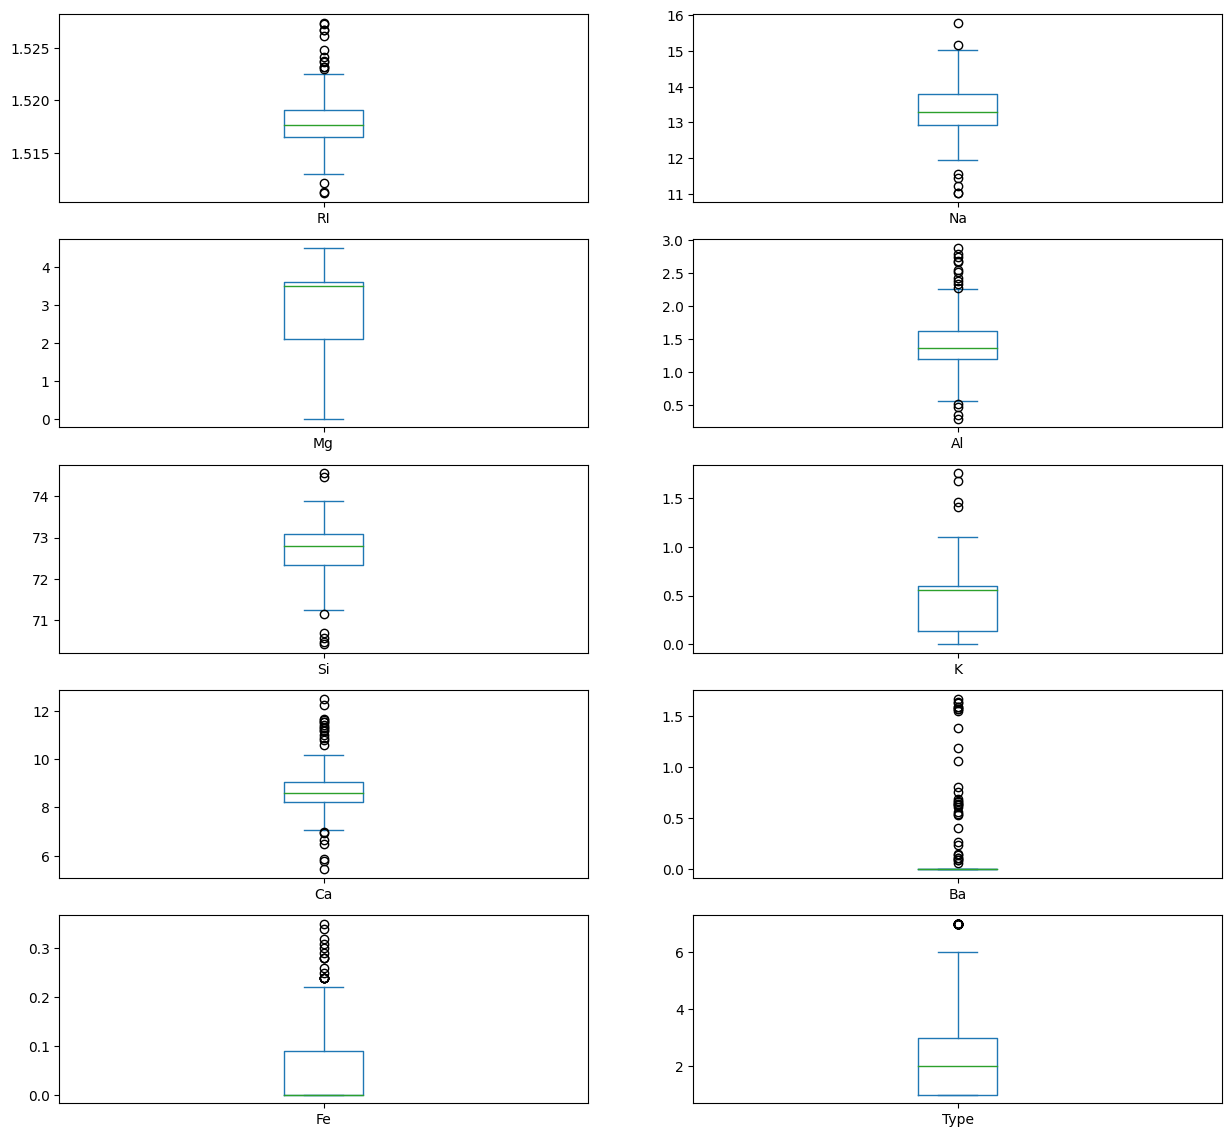

In [21]:
# Box plot find the outliers 

box_plot = glass_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = glass_df.quantile(0.25)
Q3 = glass_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(glass_df.columns, box_plot):
    outliers = ((glass_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (glass_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = glass_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [22]:
# Correlation matrix to check the multi collinearity of the features
glass_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.036453,-0.014328,-0.395589,-0.458414,-0.307104,0.610768,-0.171102,0.022468,-0.158968
Na,-0.036453,1.000000,-0.286514,0.288986,-0.211237,-0.419107,0.005789,0.464907,-0.227949,0.510595
Mg,-0.014328,-0.286514,1.000000,-0.464144,-0.212750,0.403973,-0.283237,-0.481271,0.097583,-0.744195
Al,-0.395589,0.288986,-0.464144,1.000000,0.285006,0.063836,-0.150888,0.512769,-0.081982,0.598820
Si,-0.458414,-0.211237,-0.212750,0.285006,1.000000,0.040676,-0.082547,0.168963,0.024928,0.159663
K,-0.307104,-0.419107,0.403973,0.063836,0.040676,1.000000,-0.478186,-0.246451,0.095586,-0.277774
Ca,0.610768,0.005789,-0.283237,-0.150888,-0.082547,-0.478186,1.000000,-0.131093,0.010594,0.073812
Ba,-0.171102,0.464907,-0.481271,0.512769,0.168963,-0.246451,-0.131093,1.000000,-0.123797,0.618720
Fe,0.022468,-0.227949,0.097583,-0.081982,0.024928,0.095586,0.010594,-0.123797,1.000000,-0.237090
Type,-0.158968,0.510595,-0.744195,0.598820,0.159663,-0.277774,0.073812,0.618720,-0.237090,1.000000


<AxesSubplot: >

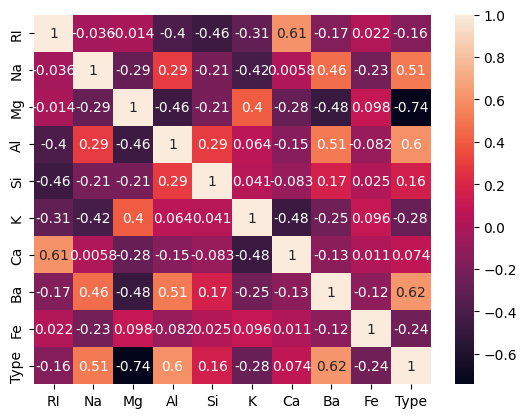

In [23]:
# Heatmaps for the given dataset.
sns.heatmap(glass_df.corr(), annot=True)

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature           VIF
0      RI  17422.026643
1      Na    657.155159
2      Mg     13.225868
3      Al     22.550817
4      Si  14218.615629
5       K      6.237334
6      Ca    128.456229
7      Ba      2.213004
8      Fe      1.480035
9    Type     10.368850


### VIF value for RI and Si are high. Hence need to drop one column and build the model to avoid multicollinearity.

### Dropping columns and creating new dataframes with dropped columns.

In [25]:
glass_df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [26]:
# Si column drooped
ri_columns = ['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Type']
ri_glass_df = glass_df[ri_columns]

In [27]:
# RI column drooped
si_columns = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
si_glass_df = glass_df[si_columns]

In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(ri_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature         VIF
0      RI  796.378286
1      Na  586.077809
2      Mg   13.185805
3      Al   21.147451
4       K    6.172781
5      Ca  123.680160
6      Ba    2.205427
7      Fe    1.480035
8    Type   10.349074


In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(si_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature         VIF
0      Na  495.818660
1      Mg   13.178586
2      Al   21.378124
3      Si  649.947160
4       K    5.970399
5      Ca  116.239886
6      Ba    2.203894
7      Fe    1.479138
8    Type   10.295177


### Comparing the dataframes we can see that VIF value of RI dropped dataframe has less VIF value. But we still need create another dataframe since in the Silicon dataframe, Na and Si has still has high VIF value so again need to drop the columns and create new dataframes.

In [30]:
# RI, SI columns dropped
na_columns = ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Type']
na_glass_df = glass_df[na_columns]

In [31]:
# RI, NA column dropped
si1_columns = ['Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
si1_glass_df = glass_df[si1_columns]

In [32]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(na_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature         VIF
0      Na  149.739396
1      Mg   13.175298
2      Al   21.026566
3       K    4.596129
4      Ca   83.199409
5      Ba    2.203054
6      Fe    1.460808
7    Type    9.955954


In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(si1_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature         VIF
0      Mg   11.956147
1      Al   21.309738
2      Si  196.286875
3       K    5.146598
4      Ca  116.044284
5      Ba    2.159077
6      Fe    1.466491
7    Type    9.079804


### Comparing the dataframes we can see that VIF value of RI and Si dropped dataframe has less VIF value. But we still need create another dataframe since in the RI and Si dropped dataframe, Na and Ca has still has high VIF value so again need to drop the columns and create new dataframes.

In [34]:
# RI, SI columns dropped
ca_columns = ['Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Type']
ca_glass_df = glass_df[ca_columns]

In [35]:
# RI, SI columns dropped
na1_columns = ['Na', 'Mg', 'Al', 'K', 'Ba', 'Fe', 'Type']
na1_glass_df = glass_df[na1_columns]

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(ca_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature        VIF
0      Mg   8.769202
1      Al  19.129727
2       K   4.579073
3      Ca  20.253648
4      Ba   2.086648
5      Fe   1.460807
6    Type   8.700134


In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(na1_glass_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature        VIF
0      Na  36.451809
1      Mg  12.450193
2      Al  21.010803
3       K   4.419374
4      Ba   1.926868
5      Fe   1.444670
6    Type   9.841397


## Dataframe with RI, Si and Na dropped show very low VIF value. Hence the dataframe has very low multicollinarity. 

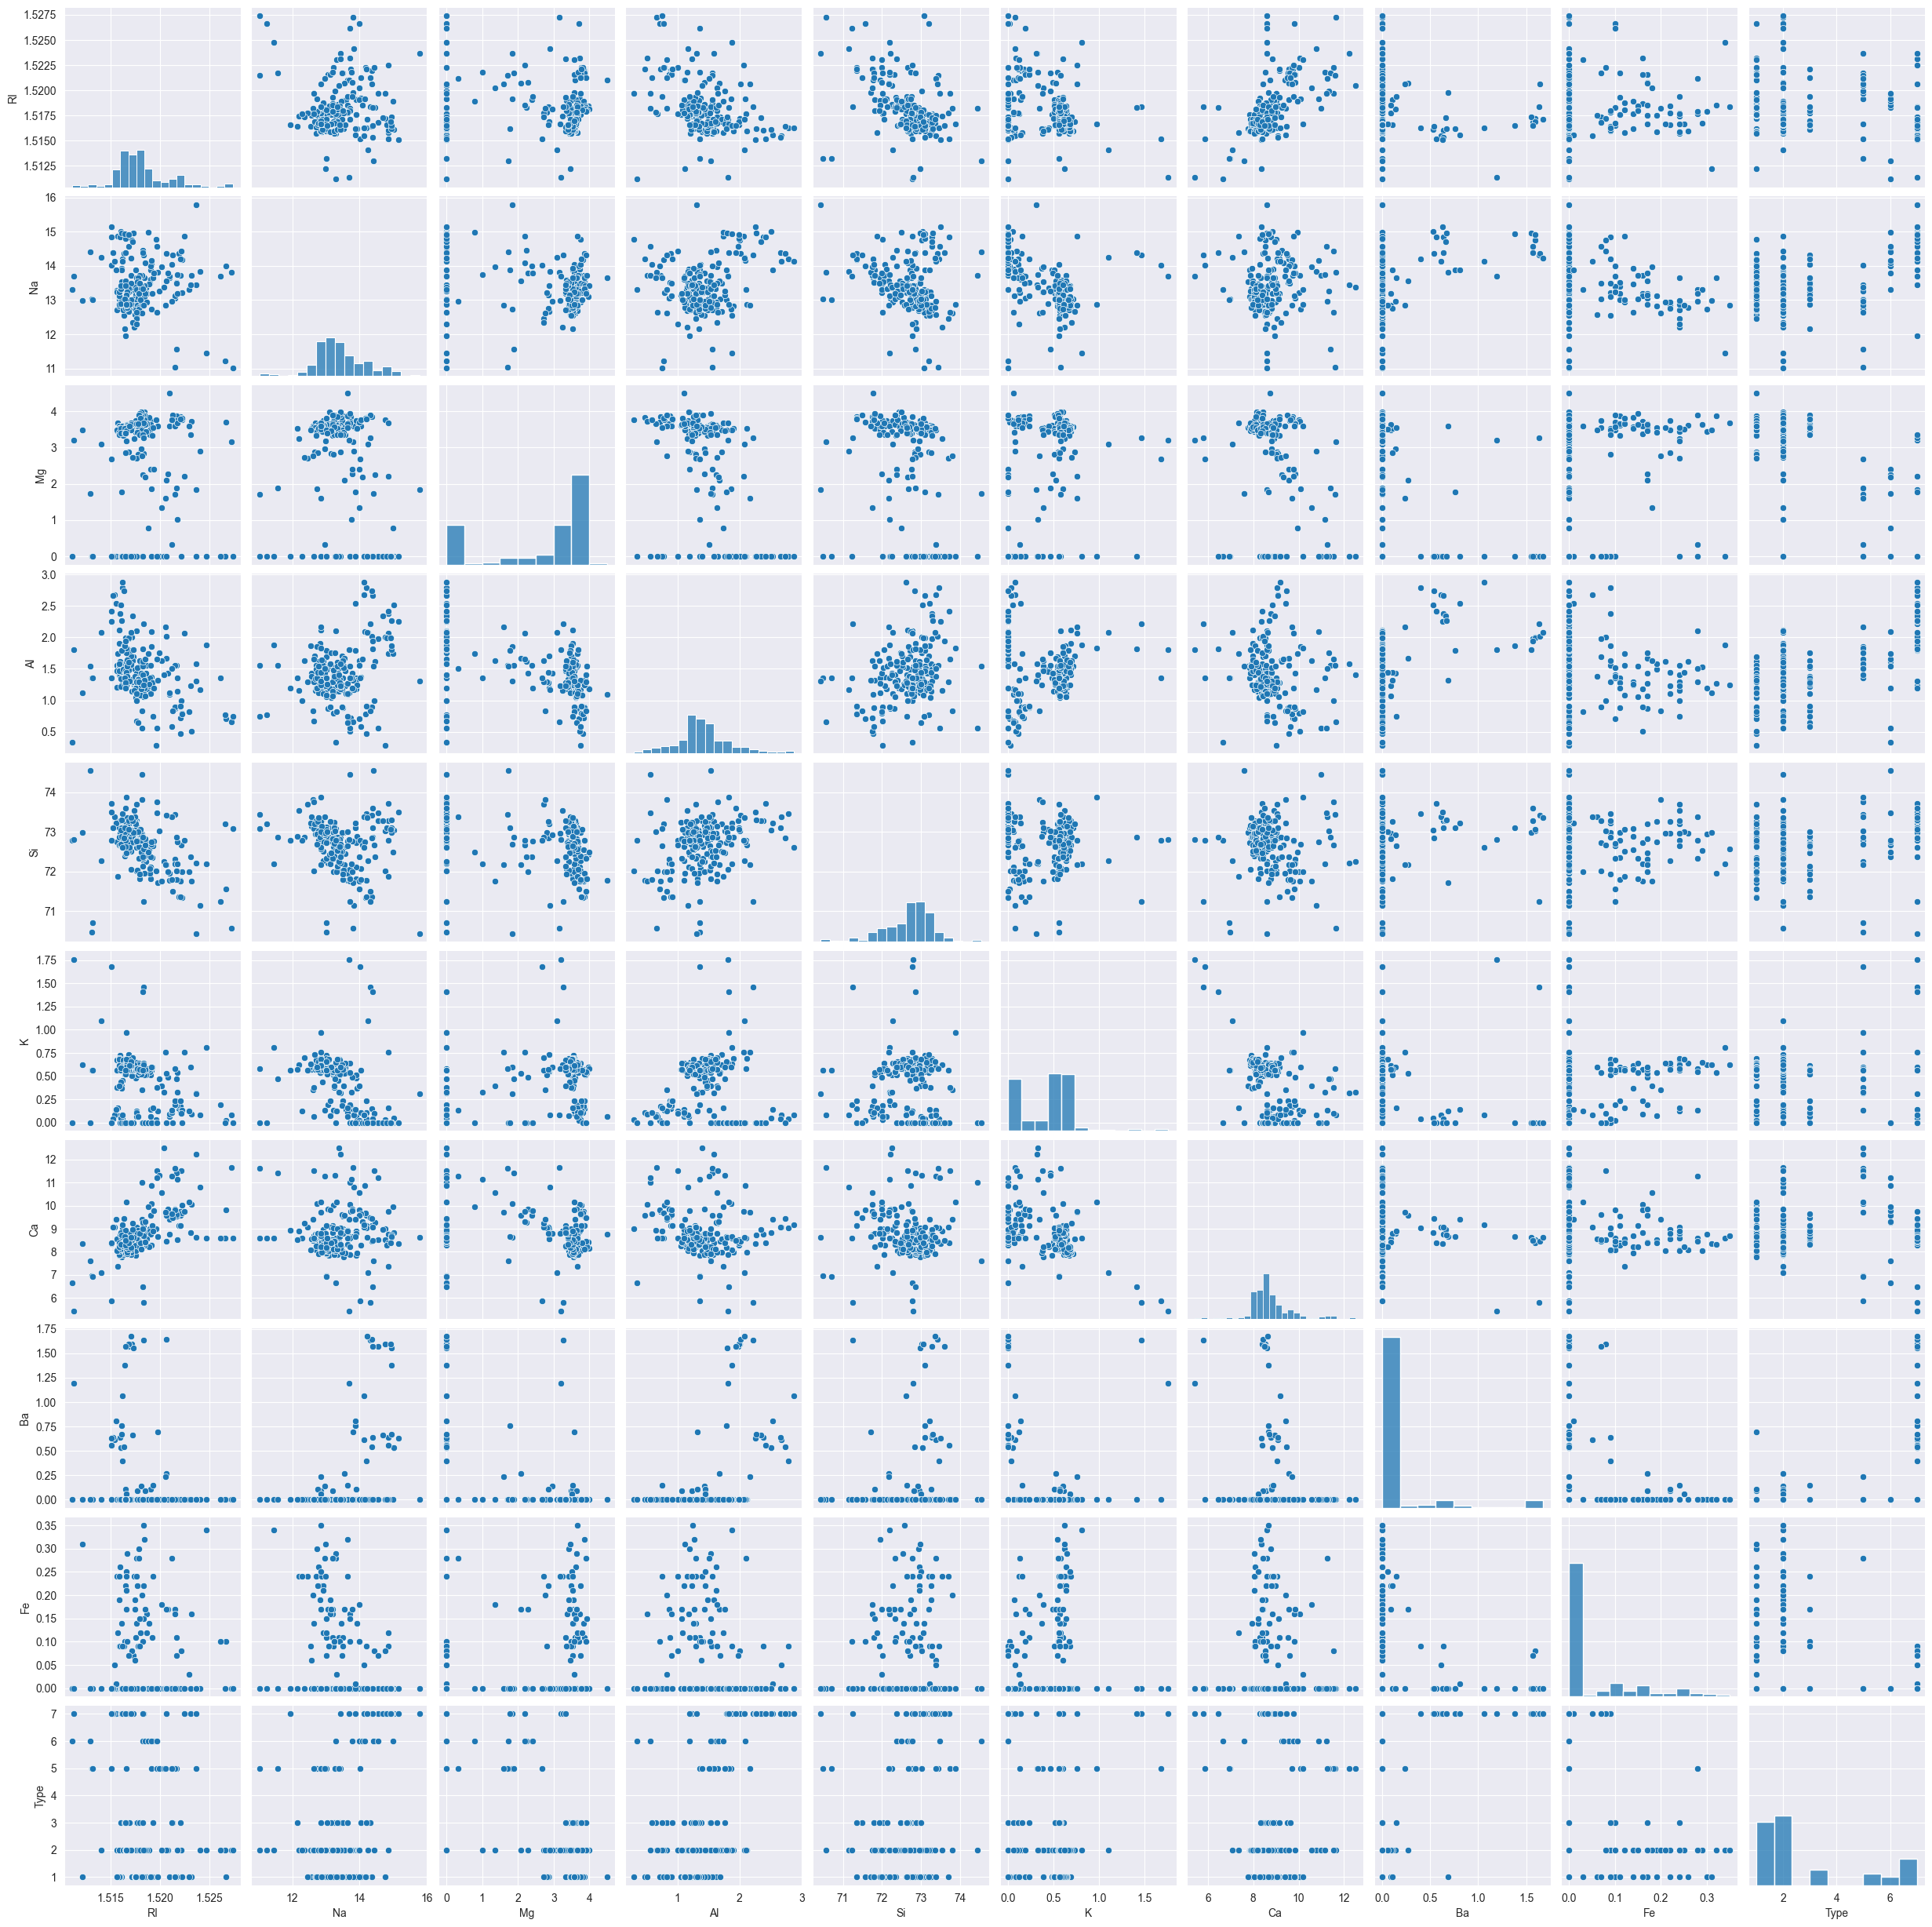

In [38]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(glass_df)

### Most of the histogram shows that the features are not normally distributed.

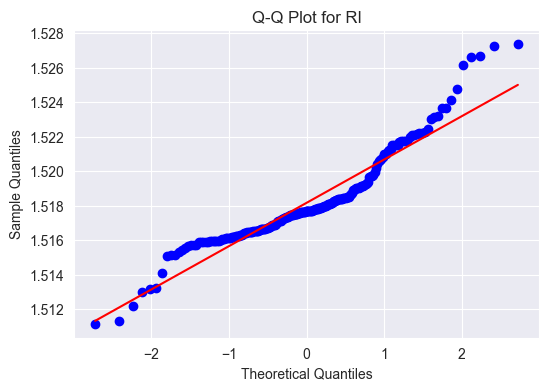

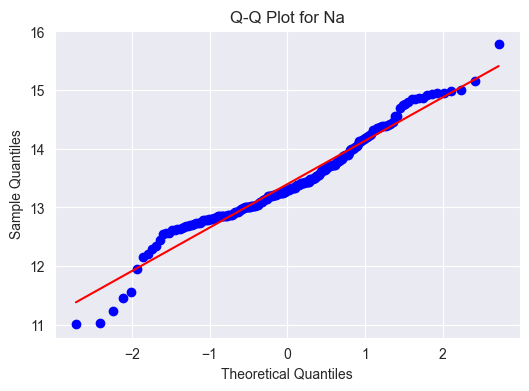

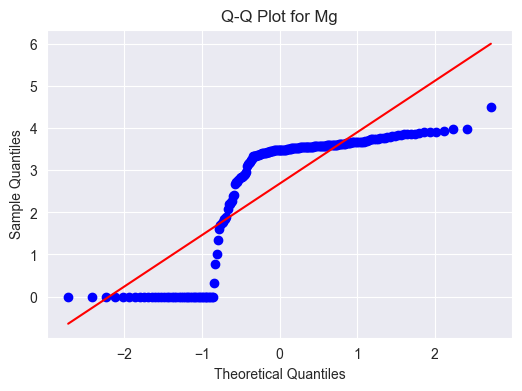

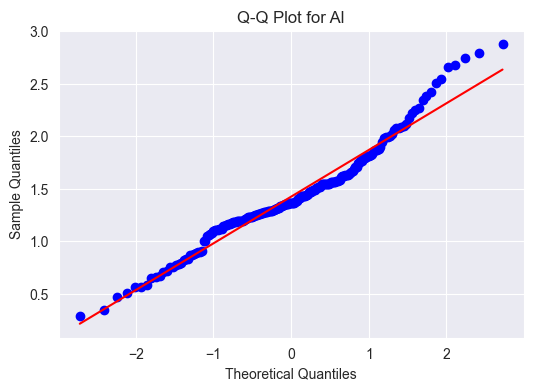

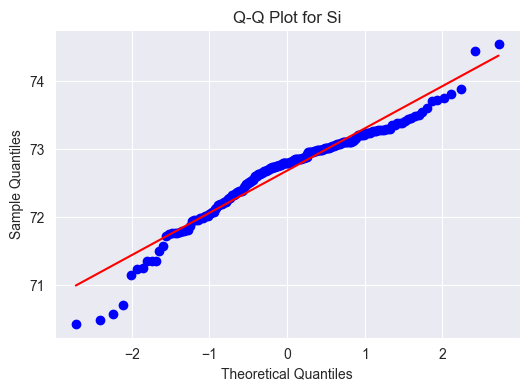

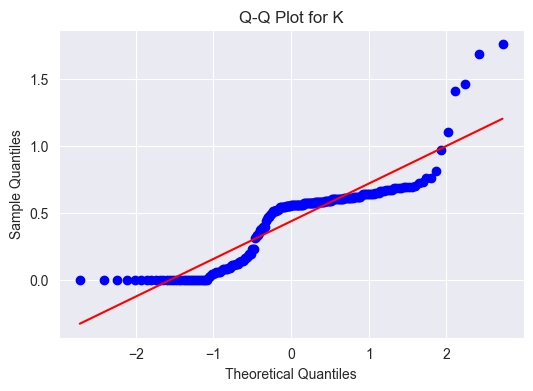

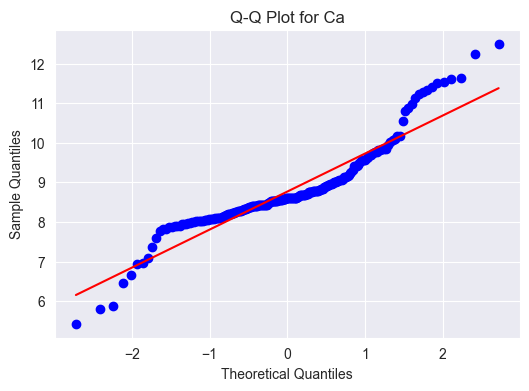

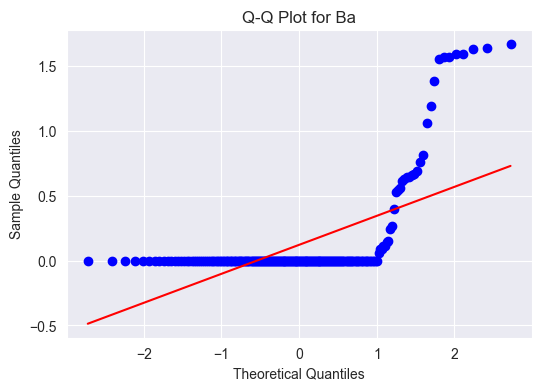

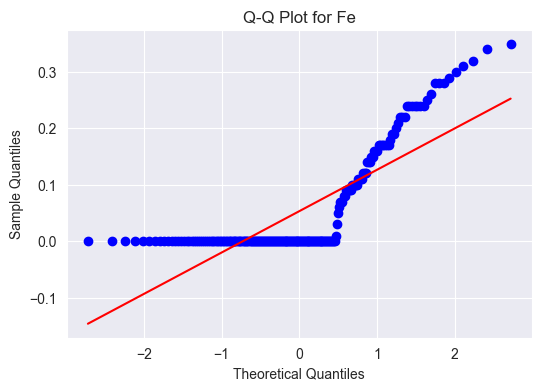

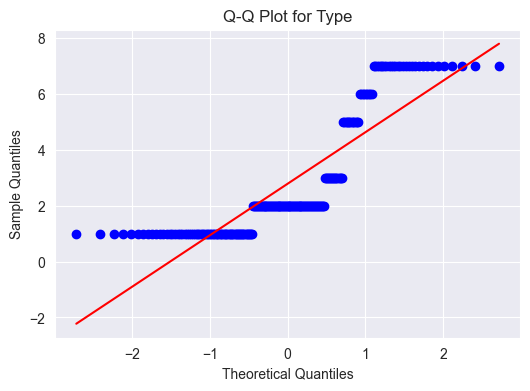

In [39]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in glass_df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(glass_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.
### Hence we can use Normalization/Standardization for transformation.¶ 

In [40]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X0 = glass_df.drop("Type", axis=1)
y0 = glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model1 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.89      0.70        18
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.71      0.57      0.61        64
weighted avg       0.69      0.69      0.67        64



In [41]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X1 = ri_glass_df.drop("Type", axis=1)
y1 = ri_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model2 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.94      0.72        18
           2       0.70      0.67      0.68        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.71      0.58      0.62        64
weighted avg       0.71      0.70      0.68        64



In [42]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X2 = si_glass_df.drop("Type", axis=1)
y2 = si_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model3 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.78      0.64        18
           2       0.68      0.71      0.69        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.67        64
   macro avg       0.70      0.56      0.61        64
weighted avg       0.69      0.67      0.66        64



In [43]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X3 = na_glass_df.drop("Type", axis=1)
y3 = na_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model4 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model4.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model4.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           2       0.62      0.75      0.68        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       0.67      0.67      0.67         3
           7       1.00      0.64      0.78        11

    accuracy                           0.67        64
   macro avg       0.65      0.56      0.58        64
weighted avg       0.67      0.67      0.65        64



In [44]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X4 = si1_glass_df.drop("Type", axis=1)
y4 = si1_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model5 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model5.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model5.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.89      0.70        18
           2       0.74      0.71      0.72        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       0.67      0.67      0.67         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.66      0.58      0.60        64
weighted avg       0.70      0.70      0.68        64



In [45]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X5 = ca_glass_df.drop("Type", axis=1)
y5 = ca_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model6 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model6.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model6.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.89      0.71        18
           2       0.72      0.75      0.73        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       0.67      0.67      0.67         3
           7       1.00      0.64      0.78        11

    accuracy                           0.70        64
   macro avg       0.66      0.57      0.59        64
weighted avg       0.70      0.70      0.68        64



In [46]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X6 = na1_glass_df.drop("Type", axis=1)
y6 = na1_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model7 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model7.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model7.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.83      0.68        18
           2       0.73      0.67      0.70        24
           3       0.00      0.00      0.00         4
           5       0.67      1.00      0.80         4
           6       0.67      0.67      0.67         3
           7       1.00      0.64      0.78        11

    accuracy                           0.69        64
   macro avg       0.61      0.63      0.60        64
weighted avg       0.68      0.69      0.67        64



### From the above model we can see that model2 has highest precision, recall, f1-score and accuracy. This accuracy is optained after dropping Si column and also the vif value was significantly reduced. Hence model2 is the final model. 

## Final Model

In [47]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X = ri_glass_df.drop("Type", axis=1)
y = ri_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
final_model = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.94      0.72        18
           2       0.70      0.67      0.68        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.71      0.58      0.62        64
weighted avg       0.71      0.70      0.68        64



In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your dataset and standardized it as shown in your code

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['K', 'Accuracy'])

# Define a range of K values to experiment with
k_values = list(range(1, 11))  # You can adjust the range as needed

# Iterate over the K values
for k in k_values:
    # Create and train a KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append K and accuracy to the results DataFrame
    results_df = results_df.append({'K': k, 'Accuracy': accuracy}, ignore_index=True)

# Display the results DataFrame
print(results_df)


      K  Accuracy
0   1.0  0.671875
1   2.0  0.625000
2   3.0  0.703125
3   4.0  0.656250
4   5.0  0.671875
5   6.0  0.718750
6   7.0  0.656250
7   8.0  0.625000
8   9.0  0.656250
9  10.0  0.640625


### As we can see K = 6 has more accuracy than K = 3. Hence K = 6 gives better model results. 

In [49]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X = ri_glass_df.drop("Type", axis=1)
y = ri_glass_df["Type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
k = 6  # You can choose the number of neighbors (k) based on your problem
final_model = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.94      0.74        18
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.72        64
   macro avg       0.72      0.59      0.63        64
weighted avg       0.72      0.72      0.70        64



## Confusion matrix for model accuracy.

In [50]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[17  1  0  0  0  0]
 [ 7 17  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 1  2  0  0  0  8]]


## Classification report for model performance

In [51]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.61      0.94      0.74        18
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.72        64
   macro avg       0.72      0.59      0.63        64
weighted avg       0.72      0.72      0.70        64

